## **WORKSHOP 001 - NOTEBOOK #2: Exploratory Data Analysis (EDA)**

This notebook focuses on conducting **Exploratory Data Analysis (EDA)** on the candidates' dataset. EDA is a fundamental step in the data analysis process, as it allows us to understand the structure and characteristics of the data. By examining the dataset, we can identify patterns, relationships, and key insights that inform further analysis and decision-making.

In this notebook, we will explore the dataset using a range of statistical and visual techniques. We will assess the distribution of variables and investigate correlations between them. Through this process, we aim to develop a thorough understanding of the dataset and extract valuable insights.

---

### **Setting Environment**

In [1]:
import os 
print(os.getcwd())

try:
    os.chdir("../../workshop-001")

except FileNotFoundError:
    print("""
        FileNotFoundError - The directory may not exist or you might not be in the specified path.
        If this has already worked, do not run this block again, as the current directory is already set to workshop-001.
        """)
    
print(os.getcwd())

d:\U\FIFTH SEMESTER\ETL\workshop-001\notebooks
d:\U\FIFTH SEMESTER\ETL\workshop-001


### **Load Data**

### **Import dependencies**

We will use Pandas to analyse the data within the DataFrame, while Matplotlib and Seaborn will be employed to generate graphs that illustrate the insights from the database.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
plt.style.use('ggplot')

In [4]:
from functions.db_connection.connection import creating_engine

### **Create engine**

The connection process has been assigned to a Python script called _connection.py_, where the function _creating_engine_ is responsible for setting up the connection to a PostgreSQL database using SQLAlchemy.

In [5]:
engine = creating_engine()

### **Load Database**

We retrieve the dataset from a table in a PostgreSQL database connected using the SQLAlchemy engine.

In [6]:
df = pd.read_sql_table("candidates_raw", engine, parse_dates=["Application Date"])
df

,First Name,Last Name,Email,Application Date,Country,YOE,Seniority,Technology,Code Challenge Score,Technical Interview Score
0,Bernadette,Langworth,leonard91@yahoo.com,2021-02-26,Norway,2,Intern,Data Engineer,3,3
1,Camryn,Reynolds,zelda56@hotmail.com,2021-09-09,Panama,10,Intern,Data Engineer,2,10
2,Larue,Spinka,okey_schultz41@gmail.com,2020-04-14,Belarus,4,Mid-Level,Client Success,10,9
3,Arch,Spinka,elvera_kulas@yahoo.com,2020-10-01,Eritrea,25,Trainee,QA Manual,7,1
4,Larue,Altenwerth,minnie.gislason@gmail.com,2020-05-20,Myanmar,13,Mid-Level,Social Media Community Management,9,7
...,...,...,...,...,...,...,...,...,...,...
49995,Bethany,Shields,rocky_mitchell@hotmail.com,2022-01-09,Dominican Republic,27,Trainee,Security,2,1
49996,Era,Swaniawski,dolores.roob@hotmail.com,2020-06-02,Morocco,21,Lead,Game Development,1,2
49997,Martin,Lakin,savanah.stracke@gmail.com,2018-12-15,Uganda,20,Trainee,System Administration,6,1
49998,Aliya,Abernathy,vivienne.fritsch@yahoo.com,2020-05-30,Czech Republic,20,Senior,Database Administration,0,0


### **Data Preprocessing**

The column names have been converted to [snake_case](https://www.theserverside.com/definition/Snake-case), which simplifies using df.query() and makes the process easier.

In [7]:
renamed_columns = {
    'First Name': 'first_name',
    'Last Name': 'last_name',
    'Email': 'email',
    'Application Date': 'application_date',
    'Country': 'country',
    'YOE': 'yoe',
    'Seniority': 'seniority',
    'Technology': 'technology',
    'Code Challenge Score': 'code_challenge_score',
    'Technical Interview Score': 'technical_interview_score'
}

df = df.rename(columns=renamed_columns)

### **Understanding the Dataset**

#### **Data column details**

The output of `df.info()` provides a summary of our dataset. 

It shows that the DataFrame contains 50,000 entries and 10 columns, with each column having *no missing values*. 

The data types are appropriately assigned: six columns are treated as objects, one is a datetime, and three are integers. 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   first_name                 50000 non-null  object        
 1   last_name                  50000 non-null  object        
 2   email                      50000 non-null  object        
 3   application_date           50000 non-null  datetime64[ns]
 4   country                    50000 non-null  object        
 5   yoe                        50000 non-null  int64         
 6   seniority                  50000 non-null  object        
 7   technology                 50000 non-null  object        
 8   code_challenge_score       50000 non-null  int64         
 9   technical_interview_score  50000 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 3.8+ MB


#### **Examining the dataset for duplicate rows.**

In [9]:
df.duplicated().sum()

np.int64(0)

The result shows that there are *no duplicate rows* in the dataset. This means every row in the dataset is unique.

#### **Examining the dataset for null values.**

In [10]:
df.isnull().sum()

first_name                   0
last_name                    0
email                        0
application_date             0
country                      0
yoe                          0
seniority                    0
technology                   0
code_challenge_score         0
technical_interview_score    0
dtype: int64

This result shows that every column has 0 missing values, indicating that there is no missing data in any of them.

#### **Counting unique values in each column**

In [11]:
df.nunique()

first_name                    3007
last_name                      474
email                        49833
application_date              1646
country                        244
yoe                             31
seniority                        7
technology                      24
code_challenge_score            11
technical_interview_score       11
dtype: int64

This output displays the number of unique values in each column for the dataset containing 50,000 entries. 

For example, almost every email is unique, while columns such as seniority and scores show a limited range of distinct values. 

Considering the overall number of records, it is unusual to observe a number of repeated emails; indeed, the difference between the total records and the email count suggests that _approximately 167 individuals may have reapplied_.

**Analising those duplicated records**

In [12]:
duplicated_emails = df.loc[df.duplicated(subset=['email'], keep=False)]
duplicated_emails["email"].value_counts()

email
marianne31@yahoo.com        3
fern70@gmail.com            3
sandra83@gmail.com          2
dewayne50@gmail.com         2
matilda17@gmail.com         2
                           ..
marjolaine91@hotmail.com    2
jazmin54@gmail.com          2
reyna2@hotmail.com          2
kasandra68@hotmail.com      2
easter75@gmail.com          2
Name: count, Length: 165, dtype: int64

This result shows that there are 165 repeated email addresses in the dataset, with two addresses appearing three times, indicating that some individuals may have reapplied.

### **Data Analysis**

In [13]:
df.describe()

,application_date,yoe,code_challenge_score,technical_interview_score
count,50000,50000.000000,50000.000000,50000.000000
mean,2020-04-03 23:04:14.592000,15.286980,4.996400,5.003880
min,2018-01-01 00:00:00,0.000000,0.000000,0.000000
25%,2019-02-17 00:00:00,8.000000,2.000000,2.000000
50%,2020-04-06 00:00:00,15.000000,5.000000,5.000000
75%,2021-05-21 00:00:00,23.000000,8.000000,8.000000
max,2022-07-04 00:00:00,30.000000,10.000000,10.000000
std,NaN,8.830652,3.166896,3.165082


The dataset covers application dates from 1 January 2018 to 4 July 2022, which explains the limited data for 2022. 

The average years of experience is 15.29, although the high standard deviation indicates significant variability among candidates. 

Additionally, both the code challenge and technical interview scores average around 5, suggesting that fewer than half of the applicants are likely to be accepted.

#### **Analising Code Challenge and Technical Interview Scores**

In [14]:
score_count = (df[['code_challenge_score', 'technical_interview_score']].agg(pd.Series.value_counts).sort_index().rename_axis('score'))
score_count

,code_challenge_score,technical_interview_score
score,,
0,4502,4539
1,4590,4588
2,4579,4500
3,4678,4528
4,4521,4578
5,4479,4527
6,4419,4471
7,4506,4578
8,4619,4555


In [15]:
total_applications = len(df)

code_challenge_percentage = (df['code_challenge_score'] >= 7).mean() * 100

technical_interview_percentage = (df['technical_interview_score'] >= 7).mean() * 100

hired_percentage = len(df[(df['code_challenge_score'] >= 7) & (df['technical_interview_score'] >= 7)]) / total_applications * 100

print("Percentage with Code Challenge Score >=7: {:.2f}%".format(code_challenge_percentage))
print("Percentage with Technical Interview Score >=7: {:.2f}%".format(technical_interview_percentage))
print("Percentage meeting both criteria (hired): {:.2f}%".format(hired_percentage))


Percentage with Code Challenge Score >=7: 36.46%
Percentage with Technical Interview Score >=7: 36.54%
Percentage meeting both criteria (hired): 13.40%


Based on the results, about 36% of candidates score 7 or above on each test. 

Given the requirement to score at least 7 on both assessments, roughly 13% of applicants would meet the criteria, indicating a selective hiring process.

The similar counts across the score range suggest that the scores are uniformly distributed.

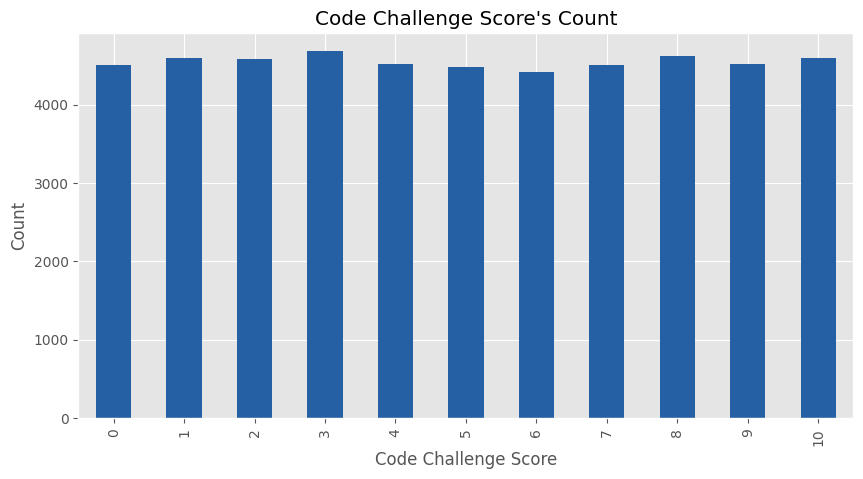

In [16]:
code_score = (df['code_challenge_score'].value_counts().sort_index())

code_score.plot(kind='bar', figsize=(10,5), title= "Code Challenge Score's Count", color='#2660a4')
plt.xlabel('Code Challenge Score')
plt.ylabel('Count')
plt.show()

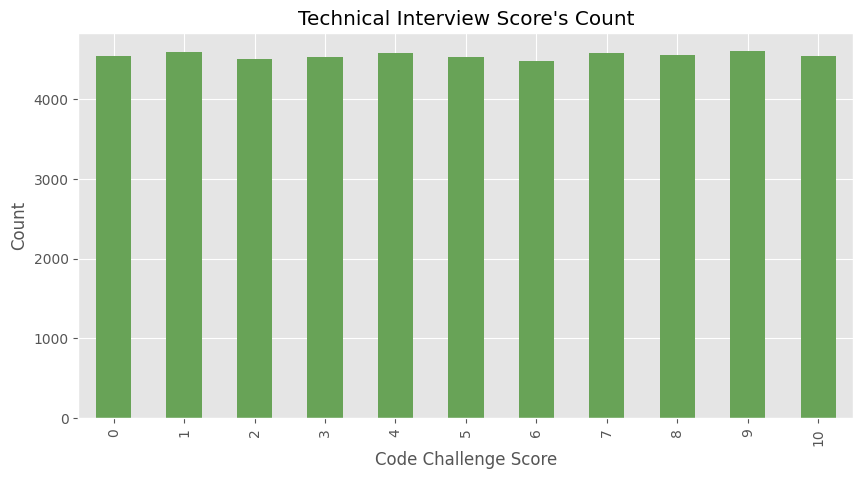

In [17]:
code_score = (df['technical_interview_score'].value_counts().sort_index())

code_score.plot(kind='bar', figsize=(10,5), title= "Technical Interview Score's Count", color='#68A357')
plt.xlabel('Code Challenge Score')
plt.ylabel('Count')
plt.show()

#### **Analising Application Dates**

We extract the year and month from the application date field, and using this data, we will examine the annual frequency of enrollees as well as the data availability across these periods.

In [18]:
df['year'] = df['application_date'].dt.year
df['month'] = df['application_date'].dt.month_name()

In [19]:
year_counts = (df['year'].value_counts().sort_index())
year_counts

year
2018    11061
2019    11009
2020    11237
2021    11051
2022     5642
Name: count, dtype: int64

The counts indicate that enrolments were fairly consistent from 2018 to 2021, with around 11,000 applications each year. However, 2022 shows a significant drop to about 5,642 entries, suggesting that the data for 2022 may be incomplete or that the application period is still ongoing.

In [20]:
month_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

monthly_counts = (df.query("year == 2022").groupby("month").size().reindex(month_order))
monthly_counts

month
January      912.0
February     844.0
March        962.0
April        923.0
May          979.0
June         910.0
July         112.0
August         NaN
September      NaN
October        NaN
November       NaN
December       NaN
dtype: float64

The monthly counts for 2022 show a steady flow of applications from January to June (around 900–980 per month), followed by a drop in July (only 112) and no data for August to December. 

This suggests that the dataset for 2022 is incomplete, likely because the application period for the latter half of the year has not been fully captured or updated yet.

#### **Hired Candidates**

Following the hiring criteria, we create a filter to select only the candidates that meet the condition of having a score equal to or greater than 7 in both assessments.

And the result of the filter will be stored in the dataframe called `df_hired`

In [21]:
df_hired = df.query('(code_challenge_score & technical_interview_score) >= 7').copy()
df_hired

,first_name,last_name,email,application_date,country,yoe,seniority,technology,code_challenge_score,technical_interview_score,year,month
2,Larue,Spinka,okey_schultz41@gmail.com,2020-04-14,Belarus,4,Mid-Level,Client Success,10,9,2020,April
22,Crawford,Ullrich,bruce.koch7@yahoo.com,2021-01-09,Dominica,14,Junior,Game Development,8,8,2021,January
26,Dorian,Zboncak,kyleigh55@yahoo.com,2020-01-26,Japan,5,Lead,Design,8,10,2020,January
34,Tierra,Romaguera,pete.reichel@yahoo.com,2018-08-21,Panama,9,Senior,Adobe Experience Manager,8,8,2018,August
53,Brian,Wehner,richie.schaefer@gmail.com,2022-02-27,Puerto Rico,18,Senior,Security,10,10,2022,February
...,...,...,...,...,...,...,...,...,...,...,...,...
49932,Alyce,Wehner,alberta_marvin@yahoo.com,2022-04-22,Algeria,4,Lead,Development - CMS Backend,9,10,2022,April
49935,Walton,Kohler,mitchell85@gmail.com,2018-12-15,Uruguay,17,Mid-Level,Database Administration,8,8,2018,December
49978,Danyka,West,susana.ratke@yahoo.com,2021-01-07,Ethiopia,25,Intern,Game Development,9,10,2021,January
49989,Bryana,Pagac,dante8@yahoo.com,2018-01-16,Nigeria,18,Intern,QA Manual,8,10,2018,January


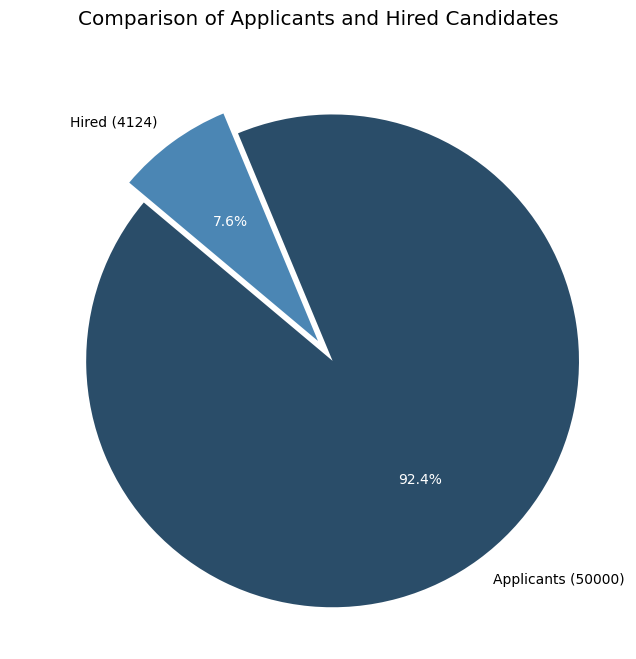

In [22]:
total_applicants = len(df)
total_hired = len(df_hired)

labels = [f'Applicants ({total_applicants})', f'Hired ({total_hired})']
sizes = [total_applicants, total_hired]
colors = ['#2A4D69','#4B86B4']
explode = (0.1, 0)

plt.figure(figsize=(8, 8))
patches, texts, autotexts = plt.pie(sizes,
                                    explode=explode,
                                    labels=labels,
                                    colors=colors,
                                    autopct='%1.1f%%',
                                    startangle=140,
                                    textprops={'color': 'black'})

for autotext in autotexts:
    autotext.set_color('white')

plt.title('Comparison of Applicants and Hired Candidates')
plt.show()


The pie chart illustrates the proportion of applicants versus hired candidates. 

The majority of applicants (92.4%) were not hired, while only a small fraction (7.6%) successfully met the hiring criteria. 

This highlights a highly selective hiring process, where only a limited number of candidates pass the required evaluation stages.

#### **Technologies Used By The Hired Candidates**

In [23]:
df_technology_count = (df_hired.groupby('technology').size().sort_values(ascending=False))
df_technology_count

technology
Game Development                           325
DevOps                                     292
Adobe Experience Manager                   184
System Administration                      177
Development - CMS Backend                  175
Database Administration                    168
Development - FullStack                    167
Client Success                             167
Mulesoft                                   166
Development - Frontend                     164
Business Analytics / Project Management    163
Salesforce                                 160
Security Compliance                        159
Development - Backend                      159
QA Manual                                  158
Development - CMS Frontend                 157
Security                                   156
Design                                     152
Business Intelligence                      151
Data Engineer                              149
QA Automation                              149
Sa

The results indicate that **Game Development** and **DevOps** have the highest number of hired candidates, suggesting a strong demand for these skill sets. 

Other technical roles, such as **Adobe Experience Manager**, **System Administration**, and **CMS Backend Development**, are also well-represented. 

Interestingly, non-development roles, including **Client Success**, **Business Analytics**, and **Sales**, show a notable presence. 

This suggests that while technical expertise remains a key factor in hiring, there is also a significant demand for professionals in *support*, *management*, and *compliance* roles.

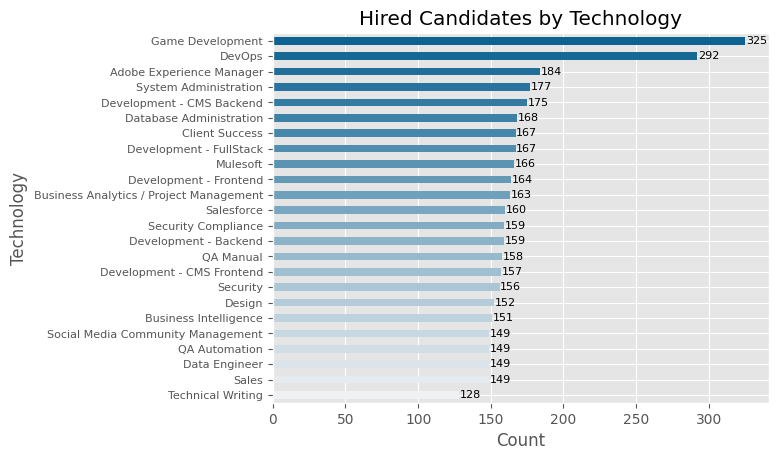

In [24]:
def color_palette(df):
    n_colors = len(df)
    return sns.color_palette("light:#0C6291", n_colors=n_colors)

df_technology_count = df_technology_count.sort_values()

df_technology_count.plot(kind='barh', color=color_palette(df_technology_count))

plt.xlabel('Count')
plt.ylabel('Technology')
plt.title('Hired Candidates by Technology')

plt.yticks(fontsize=8)

for index, value in enumerate(df_technology_count):
    plt.text(value + 0.5, index, str(value), va='center', fontsize=8)

plt.show()

#### **Countries Of The Hired Candidates**

In [25]:
df_countries_count = (df_hired.groupby('country').size().sort_values(ascending=False))
df_countries_count

country
Niger                                30
Heard Island and McDonald Islands    29
Sri Lanka                            28
Guatemala                            26
Indonesia                            26
                                     ..
Gambia                                9
Armenia                               9
Guam                                  9
Montenegro                            9
American Samoa                        7
Length: 244, dtype: int64

The results show that **Niger**, **Heard Island and McDonald Islands**, and **Sri Lanka** have the highest number of hired candidates, while several other countries, such as **Guatemala** and **Indonesia**, also have a significant presence. 

The distribution suggests that hiring is spread across a wide range of *244 countries*, though some nations have notably fewer hires, such as **American Samoa** and **Montenegro**. 

This indicates a geographically diverse hiring process, but with certain countries contributing more candidates than others.

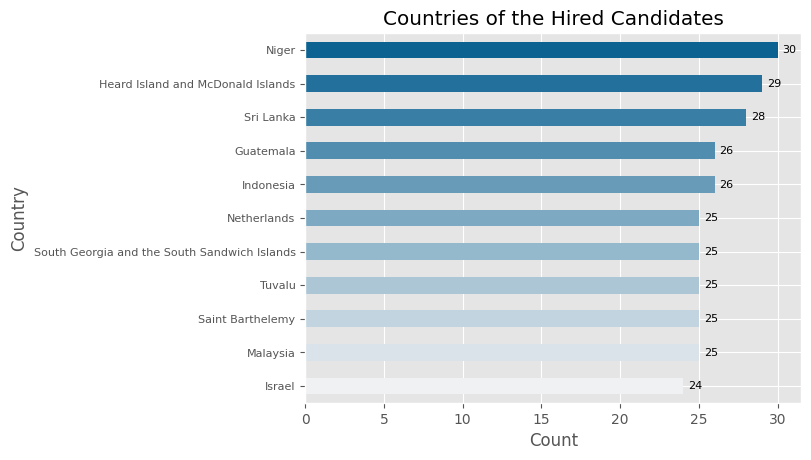

In [26]:
df_countries_count = df_countries_count[0:11].sort_values()

df_countries_count.plot(kind='barh', color=color_palette(df_countries_count))

plt.xlabel('Count')
plt.ylabel('Country')
plt.title('Countries of the Hired Candidates')

plt.yticks(fontsize=8)

for index, value in enumerate(df_countries_count):
    plt.text(value + 0.3, index, str(value), va='center', fontsize=8)

plt.show()

#### **Seniority and YOE of the Hired Candidates**

In [27]:
df_seniority_count = (df_hired.groupby('seniority').size().sort_values(ascending=False))
df_seniority_count

seniority
Intern       615
Trainee      603
Junior       592
Senior       585
Architect    582
Mid-Level    576
Lead         571
dtype: int64

The distribution of hired candidates by seniority level shows that **Interns**, **Trainees**, and **Junior positions** have the highest number of hires, suggesting a strong focus on early-career recruitment. 

**Senior**, **Architect**, and **Mid-Level roles** also have a significant presence, indicating demand for experienced professionals. 

The **Lead** position, while the least frequent, still shows a consistent hiring trend. 

This suggests a balanced hiring strategy, with an emphasis on both entry-level talent development and experienced professionals.

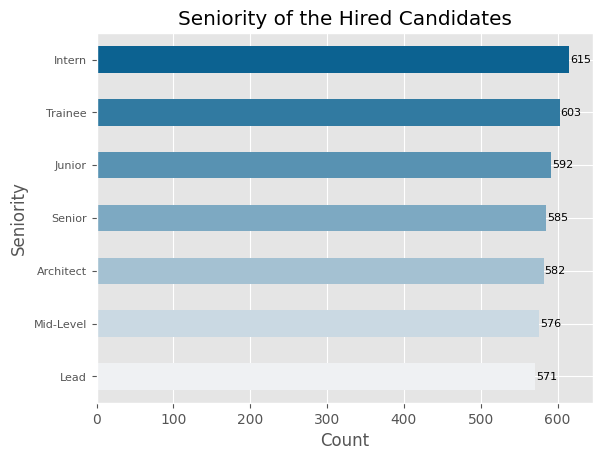

In [33]:
df_seniority_count = df_seniority_count[0:11].sort_values()

df_seniority_count.plot(kind='barh', color=color_palette(df_seniority_count))

plt.xlabel('Count')
plt.ylabel('Seniority')
plt.title('Seniority of the Hired Candidates')

plt.yticks(fontsize=8)

for index, value in enumerate(df_seniority_count):
    plt.text(value + 1, index, str(value), va='center', fontsize=8)

plt.show()

In [ ]:
seniority_avg_yoe = (df.groupby('seniority')['yoe'].mean().sort_values(ascending=False))
seniority_avg_yoe

seniority
Intern       15.406892
Lead         15.365578
Architect    15.345105
Junior       15.324930
Mid-Level    15.213291
Trainee      15.178616
Senior       15.174529
Name: yoe, dtype: float64

The *average years of experience (YoE)* by seniority level shows an unusual pattern, where **Interns** have the highest average experience (15.41 years), followed closely by *Leads*, *Architects*, and *Junior positions*. 

This is unexpected, **as senior roles typically require more experience than entry-level ones**. 

The minimal variation across all seniority levels suggests inconsistencies in the data, potential misclassification, or a dataset where years of experience are not a strict determinant of seniority. 

Further investigation is needed to understand whether this reflects reality or data inconsistencies.

---

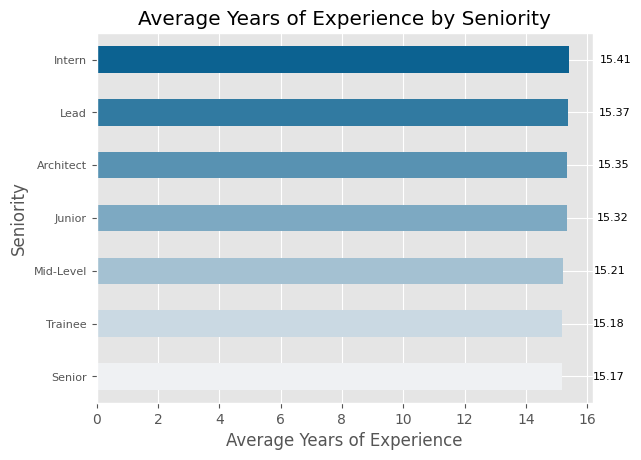

In [45]:
seniority_avg_yoe = seniority_avg_yoe.sort_values()

seniority_avg_yoe.plot(kind='barh', color=color_palette(seniority_avg_yoe))

plt.xlabel('Average Years of Experience')
plt.ylabel('Seniority')
plt.title('Average Years of Experience by Seniority')

plt.yticks(fontsize=8)

for index, value in enumerate(seniority_avg_yoe):
    plt.text(value + 1, index, f"{value:.2f}", va='center', fontsize=8)

plt.show()

### **Conclusions & Areas for Improvement in the Dataset and Hiring Process**

**1. General Insights**
    - The dataset comprises 50,000 applicants, yet only 4,124 were hired, reflecting a highly selective recruitment process.
    - The hiring criteria require a Code Challenge Score and Technical Interview Score of at least 7, leading to just 13% of applicants qualifying.
    - Game Development, DevOps, and CMS-related roles have the highest number of hires, indicating a greater demand for these skill sets.
    - Recruitment is geographically diverse, spanning 244 countries, though certain nations dominate the selection process.

**2. Anomalies & Issues in the Dataset**
    - **Years of Experience by Seniority:** The Intern role has the highest average Years of Experience (YoE) (15.41 years), which is highly unusual. The Lead and Architect roles report slightly lower averages, suggesting potential misclassification or inconsistencies in experience reporting.
    - **Score Distribution:** The distribution of the Code Challenge and Technical Interview Scores appears overly uniform, indicating a lack of differentiation in assessment difficulty or possible scoring biases.
    - **Drop in 2022 Applications:** A significant decline in applications in 2022 (5,642 candidates) raises concerns about incomplete data or a change in recruitment patterns.
    - **Missing Monthly Data in 2022:** Applications drop sharply after July 2022, with no recorded data from August to December, pointing to missing records or gaps in data collection.

**3. Areas for Improvement**
✅ Data Quality & Accuracy
    - Investigate why Interns report the highest YoE and review the classification of seniority levels.
    - Ensure all applications for 2022 are accounted for, preventing misleading trends.

✅ Hiring Process & Evaluation
    - Reassess the scoring system to ensure a greater spread of assessment results, facilitating clearer candidate differentiation.
    - Consider whether the hiring criteria (requiring 7+ scores) may be overly restrictive, leading to a low selection rate (only 13%).

✅ Data Collection & Completeness
    - Confirm that application data from August to December 2022 has been correctly recorded.
    - Improve tracking of candidates who reapply, as 165 email addresses were duplicated within the dataset.